Error decoding file g1pB_taska.txt: 'utf-8' codec can't decode byte 0x92 in position 76: invalid start byte
Error decoding file g1pB_taskb.txt: 'utf-8' codec can't decode byte 0x92 in position 9: invalid start byte
Error decoding file g1pB_taskd.txt: 'utf-8' codec can't decode byte 0x92 in position 5: invalid start byte
Error decoding file g2pA_taska.txt: 'utf-8' codec can't decode byte 0x91 in position 620: invalid start byte
Error decoding file g2pA_taskb.txt: 'utf-8' codec can't decode byte 0x91 in position 1367: invalid start byte
Error decoding file g2pB_taska.txt: 'utf-8' codec can't decode byte 0x92 in position 1436: invalid start byte
Error decoding file g2pB_taskb.txt: 'utf-8' codec can't decode byte 0x92 in position 53: invalid start byte
Error decoding file g2pB_taskc.txt: 'utf-8' codec can't decode byte 0x92 in position 1182: invalid start byte
Error decoding file g3pA_taska.txt: 'utf-8' codec can't decode byte 0x93 in position 460: invalid start byte
Error decoding file g4

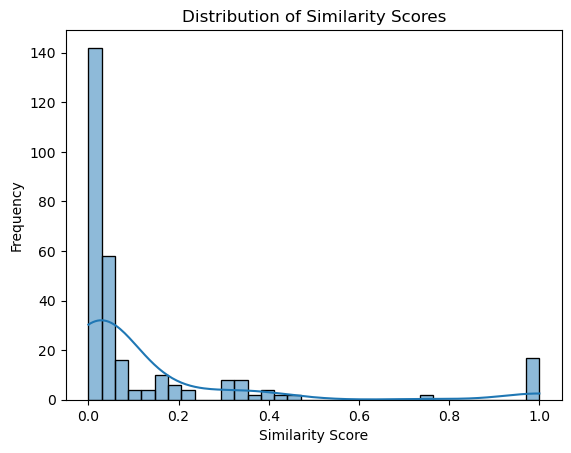

Accuracy: 0.00%


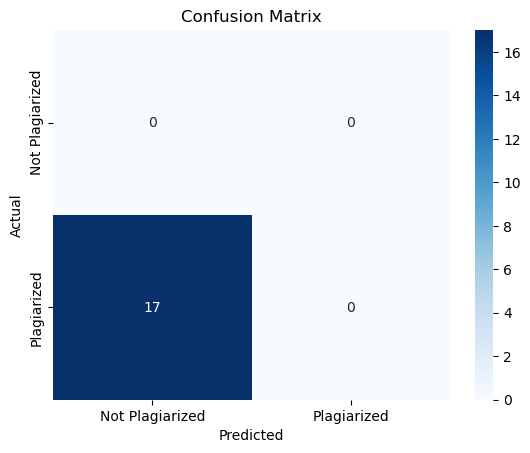

In [12]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Step 1: Import the dataset
dataset_path = 'dataset'
dataset_files = [doc for doc in os.listdir(dataset_path) if doc.endswith('.txt')]

# Step 2: Clean the data (Include stopwords removal)
stop_words = set(stopwords.words('english'))

dataset_contents = []
failed_files = []

def clean_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

for file in dataset_files:
    try:
        for encoding in ['utf-8', 'latin-1', 'ISO-8859-1']:
            with open(os.path.join(dataset_path, file), 'r', encoding=encoding) as f:
                content = f.read()
                cleaned_content = clean_text(content)
                dataset_contents.append(cleaned_content)
                break  # Break out of the encoding loop if successful
    except UnicodeDecodeError as e:
        print(f"Error decoding file {file}: {e}")
        failed_files.append(file)

# Remove failed files from the dataset
dataset_files = [file for file in dataset_files if file not in failed_files]

# Continue with the rest of your code...


# Step 3: Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    dataset_contents, dataset_files, test_size=0.2, random_state=42
)

train_df = pd.DataFrame({'Label': train_labels, 'Column1': [0.0] * len(train_labels), 'Column2': [0.0] * len(train_labels), 'Column3': [0.0] * len(train_labels)})

# Assuming you want to save the first three columns with 0.0 values
train_df.to_csv('train.csv', sep='\t', index=False, header=False)

# ...

# Step 4: Create a model (TfidfVectorizer)
def vectorize(text):
    return TfidfVectorizer().fit_transform(text).toarray()

# Step 5: Train the model
train_vectors = vectorize(train_data)

# Step 6: Make predictions (Checking plagiarism)
test_vectors = vectorize(test_data)

plagiarism_result = []

def check_plagiarism():
    global test_vectors, dataset_files
#     plagiarism_result = []
    for test_a, text_vector_a, label_a in zip(test_data, test_vectors, test_labels):
        for test_b, text_vector_b, label_b in zip(test_data, test_vectors, test_labels):
            simscore = cosine_similarity([text_vector_a, text_vector_b])[0][1]
            label_pair = sorted((label_a, label_b))
            result = {'File1': label_a, 'File2': label_b, 'Similarity': simscore, 'Plagiarism': label_pair[0] == label_pair[1]}
            plagiarism_result.append(result)
    return plagiarism_result

# Step 7: Evaluate (Printing results)
plagiarism_results = check_plagiarism()
for data in plagiarism_results:
    print(data)

# Graphical Representation
result_df = pd.DataFrame(plagiarism_results)
sns.histplot(result_df['Similarity'], kde=True)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()

# Step 9: Calculate Accuracy
predicted_labels = result_df.groupby('File1')['Plagiarism'].mean() > 0.5
accuracy = accuracy_score(result_df.groupby('File1')['Plagiarism'].max(), predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 10: Confusion Matrix
conf_matrix = confusion_matrix(result_df.groupby('File1')['Plagiarism'].max(), predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Plagiarized', 'Plagiarized'], yticklabels=['Not Plagiarized', 'Plagiarized'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yoseph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
stop_words = set(stopwords.words('english'))

dataset_contents = []
failed_files = []

def clean_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)
for file in dataset_files:
    try:
        with open(os.path.join(dataset_path, file), 'r', encoding='utf-8') as f:
            content = f.read()
            cleaned_content = clean_text(content)
            dataset_contents.append(cleaned_content)
    except UnicodeDecodeError as e:
        print(f"Error decoding file {file}: {e}")
        failed_files.append(file)
cleaned_content

dataset_files = [file for file in dataset_files if file not in failed_files]

In [16]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
cleaned_content

'mathematics computer science dynamic programming method solving problems exhibit properties overlapping subproblems optimal substructure described method takes much less time naive methods term originally used 1940s richard bellman describe process solving problems one needs find best decisions one another 1953 refined modern meaning field founded systems analysis engineering topic recognized ieee bellman contribution remembered name bellman equation central result dynamic programming restates optimization problem recursive form word programming dynamic programming particular connection computer programming instead comes term mathematical programming synonym optimization thus program optimal plan action produced instance finalized schedule events exhibition sometimes called program programming sense means finding acceptable plan action algorithm optimal substructure means optimal solutions subproblems used find optimal solutions overall problem example shortest path goal vertex graph 

In [ ]:
# Step 9: Calculate F1 Score
from sklearn.metrics import f1_score

f1 = f1_score(result_df.groupby('File1')['Plagiarism'].max(), predicted_labels)
print(f"F1 Score: {f1:.2f}")